In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [3]:
df = pd.read_csv("C:/Users/safye/Desktop/makine_ogrenmesi/dogRegMod/datalarr/archive/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [6]:
df.shape

(263, 20)

In [7]:
lasso_model = Lasso().fit(X_train, y_train)

C:\Users\safye\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [8]:
lasso_model

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [9]:
lasso_model.intercept_

np.float64(-5.587450677336506)

In [10]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [11]:
#farklı lambda değerlerine karşılık katsayılar

In [16]:
lasso = Lasso()
coefs = []
#alphas = np.random.randint(0,100000,10)
alphas = 10**np.linspace(10, -2, 100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Users\safye\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\safye\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\safye\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

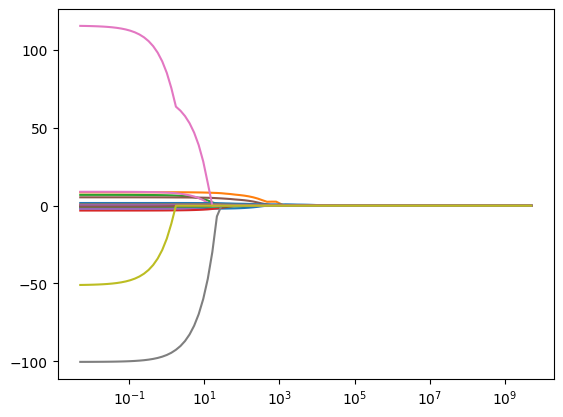

In [17]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

Tahmin

In [18]:
lasso_model

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Modelin, eğitildiği veri kümesinin ilk 5 gözlemi için yaptığı tahminlere bakalım:

In [19]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

Modelin, eğitim sırasında hiç görmediği test veri kümesinin ilk 5 gözlemi için yaptığı tahminlere bakalım:

In [21]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [22]:
y_pred = lasso_model.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(356.0975884554034)

In [24]:
r2_score(y_test, y_pred)

0.41422798132366156

Model Tuning

In [25]:
lasso_cv_model = LassoCV(cv = 10, max_iter=100000).fit(X_train, y_train)

In [26]:
lasso_cv_model.alpha_

np.float64(563.4670501833853)

In [27]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [28]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

In [29]:
y_pred = lasso_tuned.predict(X_test)

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(373.59572250697937)

In [31]:
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64